In [1]:
import numpy
import pandas
import math
import matplotlib.pyplot as graph


In [2]:
data=pandas.read_csv('https://www.cognifront.com/utils.php?getkmc=true')
data

,Unnamed: 0,x,y
0,0,2,3
1,1,5,1
2,2,4,4
3,3,4,4
4,4,5,4
5,5,3,4
6,6,3,3
7,7,3,1
8,8,9,11
9,9,11,9


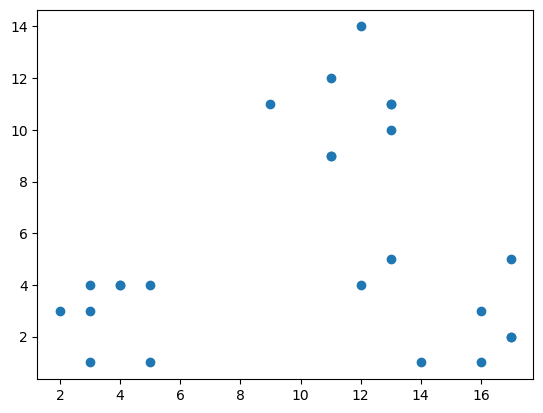

In [3]:
graph.scatter(data.x,data.y)

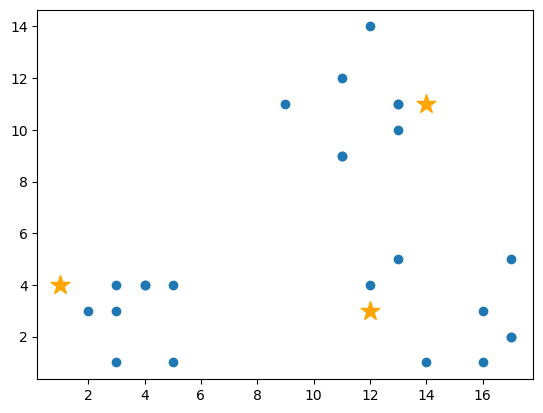

In [4]:
kmeans=[[1,4],[14,11],[12,3]]
graph.scatter(data.x,data.y)

for i in range(len(kmeans)):
    graph.scatter(kmeans[i][0],kmeans[i][1],c='orange',marker='*',s=200)

In [9]:
kmeans=[[1,4],[14,11],[12,3]]
data['cluster']=numpy.arange(0,len(data)) #Create a column cluster in data

for i in range(len(data)):
    kindex=-1 #means this index is not in any cluster
    threshold=100000

    for k in range(len(kmeans)):  # formula ((x2-x1)**2+(y2-y1)**2)**0.5
        distance = math.sqrt((data.x.values[i] - kmeans[k][0])**2 + (data.y.values[i] - kmeans[k][1])**2)
        if distance < threshold:
            threshold = distance

            kindex=k
    data['cluster'][i]=kindex
data

C:\Users\PRATHMESH\AppData\Local\Temp\ipykernel_33368\520337832.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'][i]=kindex
C:\Users\PRATHMESH\AppData\Local\Temp\ipykernel_33368\520337832.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'][i]=kindex
C:\Users\PRATHMESH\AppData\Local\Temp\ipykernel_33368\520337832.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'][i]=kindex
C:\Users\P

,Unnamed: 0,x,y,cluster
0,0,2,3,0
1,1,5,1,0
2,2,4,4,0
3,3,4,4,0
4,4,5,4,0
5,5,3,4,0
6,6,3,3,0
7,7,3,1,0
8,8,9,11,1
9,9,11,9,1


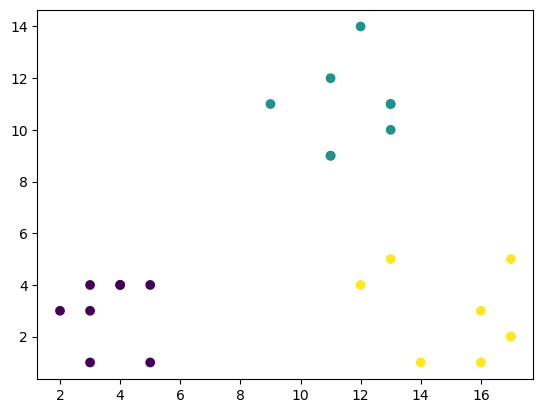

In [10]:
graph.scatter(data.x,data.y,c=data.cluster)

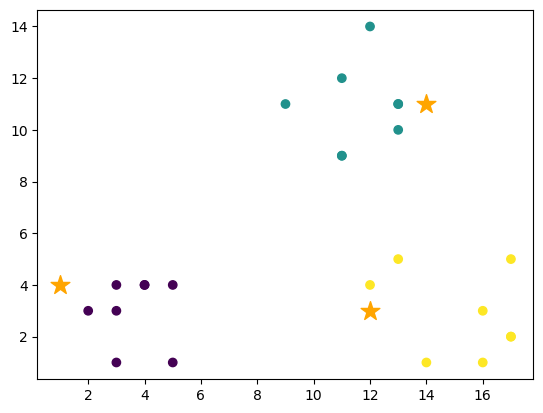

In [11]:
graph.scatter(data.x,data.y,c=data.cluster)

for i in range(len(kmeans)):
    graph.scatter(kmeans[i][0],kmeans[i][1],c='orange',marker='*',s=200)

In [13]:
clustArray=numpy.unique(data.cluster)
print(clustArray)
for k in clustArray:
    DF_Clusterwise=data[data.cluster==k]
    print(DF_Clusterwise)
    print('      ')

[0 1 2]
   Unnamed: 0  x  y  cluster
0           0  2  3        0
1           1  5  1        0
2           2  4  4        0
3           3  4  4        0
4           4  5  4        0
5           5  3  4        0
6           6  3  3        0
7           7  3  1        0
      
    Unnamed: 0   x   y  cluster
8            8   9  11        1
9            9  11   9        1
10          10  12  14        1
11          11  11  12        1
12          12  13  10        1
13          13  13  11        1
14          14  13  11        1
15          15  11   9        1
      
    Unnamed: 0   x  y  cluster
16          16  13  5        2
17          17  16  3        2
18          18  12  4        2
19          19  17  5        2
20          20  17  2        2
21          21  16  1        2
22          22  17  2        2
23          23  14  1        2
      


[[3.625, 3.0], [11.625, 10.875], [15.25, 2.875]]


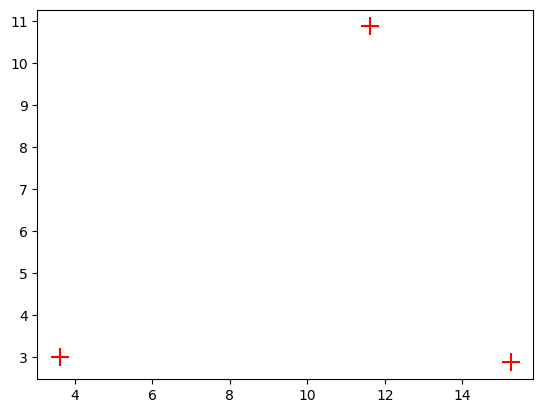

In [14]:
#find the x-mean and y-mean of each cluster
#These will be the new centroid of kmeans

def computeCentroids(data):
    clustArray=numpy.unique(data.cluster)
    newkmeans=[]
    for k in clustArray:
        DF_Cluster=data[data.cluster == k]
        newkmeans.append([DF_Cluster.x.mean(),DF_Cluster.y.mean()])
        graph.scatter(DF_Cluster.x.mean(),DF_Cluster.y.mean(),c='red',marker='+',s=150)
    return newkmeans
newkmeans=computeCentroids(data)
print(newkmeans)

[[3.625, 3.0], [11.625, 10.875], [15.25, 2.875]]


[[3.625, 3.0], [11.625, 10.875], [15.25, 2.875]]

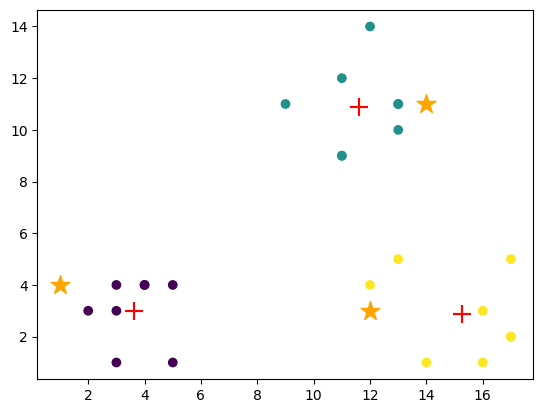

In [16]:
def computeCentroids(data):
    clustArray=numpy.unique(data.cluster)
    newkmeans=[]
    for k in clustArray:
        DF_Cluster=data[data.cluster == k]
        newkmeans.append([DF_Cluster.x.mean(),DF_Cluster.y.mean()])
        graph.scatter(DF_Cluster.x.mean(),DF_Cluster.y.mean(),c='red',marker='+',s=150)
    return newkmeans
newkmeans=computeCentroids(data)
print(newkmeans)


#Print pprevious centroid
graph.scatter(data.x,data.y,c=data.cluster)
for i in range(len(kmeans)):
    graph.scatter(kmeans[i][0],kmeans[i][1],c='orange',marker='*',s=200)
computeCentroids(data)

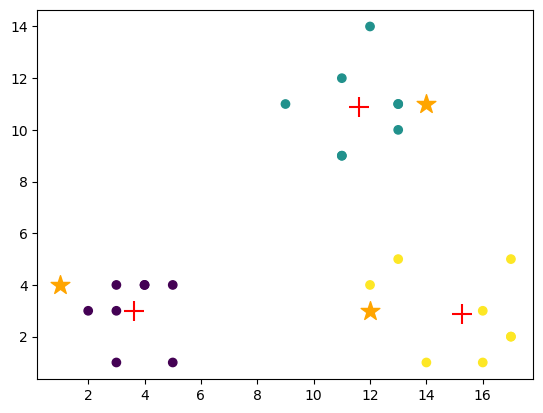

In [17]:
graph.scatter(data.x,data.y,c=data.cluster)
for i in range(len(kmeans)):
    graph.scatter(kmeans[i][0],kmeans[i][1],c='orange',marker='*',s=200)
    graph.scatter(newkmeans[i][0],newkmeans[i][1],c='red',marker='+',s=200)

In [18]:
newkmeans=[[3.625, 3.0], [11.625, 10.875], [15.25, 2.875]]
data['newcluster']=numpy.arange(0,len(data)) #Create a column cluster in data

for i in range(len(data)):
    kindex=-1 #means this index is not in any cluster
    threshold=100000

    for k in range(len(newkmeans)):  # formula ((x2-x1)**2+(y2-y1)**2)**0.5
        distance = math.sqrt((data.x.values[i] - kmeans[k][0])**2 + (data.y.values[i] - kmeans[k][1])**2)
        if distance < threshold:
            threshold = distance

            kindex=k
    data['newcluster'][i]=kindex
data

C:\Users\PRATHMESH\AppData\Local\Temp\ipykernel_33368\3435350971.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['newcluster'][i]=kindex
C:\Users\PRATHMESH\AppData\Local\Temp\ipykernel_33368\3435350971.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['newcluster'][i]=kindex
C:\Users\PRATHMESH\AppData\Local\Temp\ipykernel_33368\3435350971.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['newcluster'][i]=kinde

,Unnamed: 0,x,y,cluster,newcluster
0,0,2,3,0,0
1,1,5,1,0,0
2,2,4,4,0,0
3,3,4,4,0,0
4,4,5,4,0,0
5,5,3,4,0,0
6,6,3,3,0,0
7,7,3,1,0,0
8,8,9,11,1,1
9,9,11,9,1,1


In [19]:
import pandas

data = pandas.read_csv('https://www.cognifront.com/utils.php?getkmcrent=true')
data

,city,property,area,rent
0,nashik,residential,800,5000
1,nashik,residential,1200,12000
2,nashik,residential,960,10500
3,nashik,residential,1000,12000
4,mumbai,residential,900,19000
5,mumbai,residential,1000,25000
6,mumbai,residential,1050,26000
7,mumbai,residential,800,20000
8,bangalore,residential,843,30000
9,bangalore,residential,750,35000


In [21]:
data.columns

Index(['city', 'property', 'area', 'rent'], dtype='object')

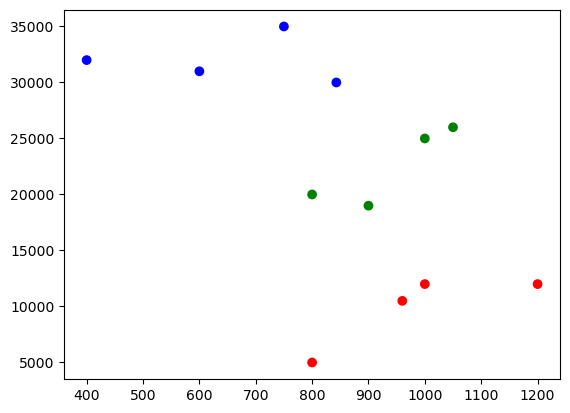

In [22]:
colormap={'nashik':'red','mumbai':'green','bangalore':'blue'}
graph.scatter(data.area,data.rent,c=data.city.map(colormap))

C:\Users\PRATHMESH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PRATHMESH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


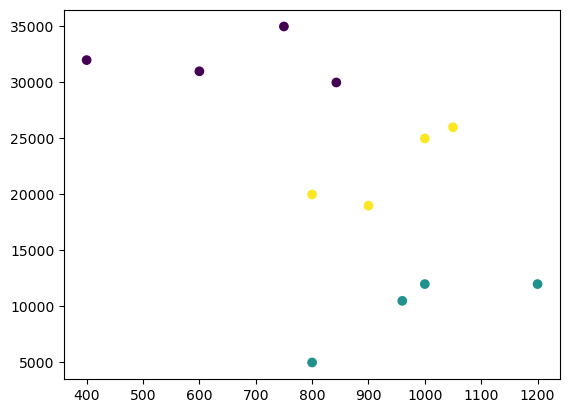

In [25]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3)
predictions=model.fit_predict(data[['area','rent']])
data['cluster']=predictions
graph.scatter(data.area,data.rent,c=data.cluster)

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

scaler.fit(data[['area']])
data.area=scaler.transform(data[['area']])

scaler.fit(data[['rent']])
data.rent=scaler.transform(data[['rent']])
data

,city,property,area,rent,cluster
0,nashik,residential,0.50000,0.000000,1
1,nashik,residential,1.00000,0.233333,1
2,nashik,residential,0.70000,0.183333,1
3,nashik,residential,0.75000,0.233333,1
4,mumbai,residential,0.62500,0.466667,2
5,mumbai,residential,0.75000,0.666667,2
6,mumbai,residential,0.81250,0.700000,2
7,mumbai,residential,0.50000,0.500000,2
8,bangalore,residential,0.55375,0.833333,0
9,bangalore,residential,0.43750,1.000000,0


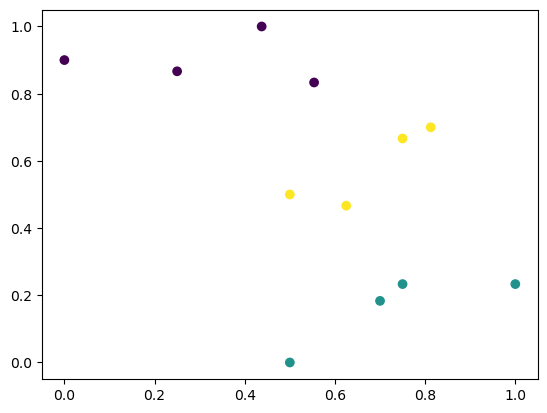

In [28]:
graph.scatter(data.area,data.rent,c=data.cluster)

In [1]:
area=1000
rent=5000
